In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from tensorflow import keras
import tensorflow as tf

data = keras.datasets.fashion_mnist
((X_train, y_train),(X_test,y_test)) = data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape[0],'imagens de treino')
print(X_test.shape[0],'imagens de teste')

60000 imagens de treino
10000 imagens de teste


In [4]:
print(X_test.shape[1],'x',X_test.shape[2],'(formato da imagem em pixels)')

28 x 28 (formato da imagem em pixels)


### Usando matplotlib para visualizar nossas imagens

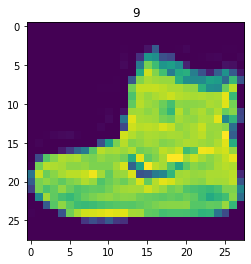

In [5]:
import matplotlib.pyplot as plt

plt.title(y_train[0])
plt.imshow(X_train[0])

In [6]:
print(f'as labels vao de {y_train.min()} a {y_train.max()}')
total_classificacoes = 10

as labels vao de 0 a 9


## Adicionando nomes às categorias

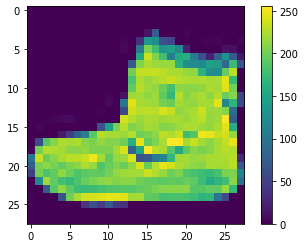

In [7]:
nomes_clf = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
'''
for imagem in range(10):
    plt.subplot(2,5, imagem+1) # linhas, colunas, o que queremos fazer com as imagens(iterar)
    plt.imshow(X_train[imagem])
    plt.title(nomes_clf[y_train[imagem]])
'''
#visualizadno a gradação de cores da nossa imagem
plt.imshow(X_train[0])
plt.colorbar()

## O modelo possui:
* Uma sequência
* Entrada
* Processamento
* Saída

## Normalizando as imagens de treino

In [8]:
# Para fazer isso, vamos dividir todos os valores do X_train por 255, ou qualquer outro numero que ajude
# A reduzir esta complexidade, reduzindo a perda do nosso modelo
X_train = X_train/255.0

In [9]:
X_train = X_train/255.0

from keras import layers
# Flatten layer is used to make the multidimensional input one-dimensional,
# commonly used in the transition from the convolution layer to the full connected layer.
model = keras.Sequential([
    # nossa imagem possui 28px x 28px usamos o flaten para transformar isso em uma unica dimensão
    layers.Flatten(input_shape=(28,28)),
    
    # processamento (dense layer (totalmente conectada))
    # opte por multiplos quando for definir o numero de neurons
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    
    #output(classificação, output = n de categorias)
    #A função de ativação softmax é usada em redes neurais de classificação.
    #Ela força a saída de uma rede neural a representar a probabilidade dos dados serem de uma das classes definidas.
    layers.Dense(total_classificacoes, activation='softmax'),

])


2022-10-20 18:35:50.584587: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Compilando e treinando o nosso modelo

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.0001, # minimium amount of change to count as an improvement
    patience=10, # how many epochs to wait before stopping
    restore_best_weights=True,
)

model.compile(
    optimizer='adam',
    #entropia para multicategorias
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(X_train,y_train,batch_size=512,epochs=60, callbacks=early_stopping, validation_split=0.1)

2022-10-20 18:35:51.060429: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/60
106/106 [==============================] - 2s 15ms/step - loss: 1.0642 - accuracy: 0.6728 - val_loss: 2.1822 - val_accuracy: 0.0948
Epoch 2/60
106/106 [==============================] - 1s 12ms/step - loss: 0.6002 - accuracy: 0.7910 - val_loss: 1.9670 - val_accuracy: 0.1422
Epoch 3/60
106/106 [==============================] - 1s 12ms/step - loss: 0.5194 - accuracy: 0.8167 - val_loss: 1.6033 - val_accuracy: 0.5593
Epoch 4/60
106/106 [==============================] - 1s 11ms/step - loss: 0.4781 - accuracy: 0.8320 - val_loss: 1.1549 - val_accuracy: 0.7685
Epoch 5/60
106/106 [==============================] - 1s 12ms/step - loss: 0.4512 - accuracy: 0.8411 - val_loss: 0.7338 - val_accuracy: 0.8332
Epoch 6/60
106/106 [==============================] - 1s 12ms/step - loss: 0.4310 - accuracy: 0.8466 - val_loss: 0.5121 - val_accuracy: 0.8375
Epoch 7/60
106/106 [==============================] - 1s 12ms/step - loss: 0.4164 - accuracy: 0.8507 - val_loss: 0.4356 - val_accuracy: 0.8505

Previsto: T-shirt/top
Categoria prevista: 0
Categoria real: 0


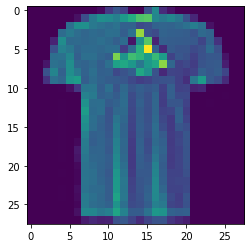

In [11]:
i = 906
# 60
preds = model.predict(X_test)
name = nomes_clf[np.argmax(preds[i])]
plt.imshow(X_test[i])
print('Previsto:',name)
print('Categoria prevista:',np.argmax(preds[i]))
print('Categoria real:',y_test[i])

# Validando o nosso modelo

In [12]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('perda do teste:', test_loss)
print('acurácia do teste:',test_accuracy )

313/313 [==============================] - 1s 3ms/step - loss: 30462.9727 - accuracy: 0.7918
perda do teste: 30462.97265625
acurácia do teste: 0.7918000221252441


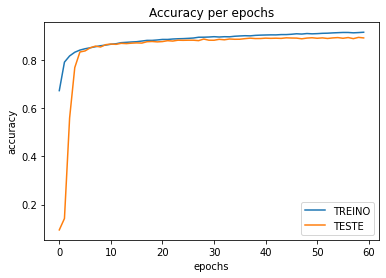

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy per epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['TREINO','TESTE'],)

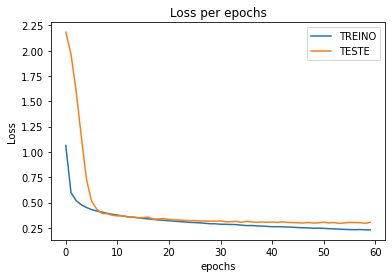

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss per epochs')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['TREINO','TESTE'],)

# Overfitting e Underfitting

### Overfitting

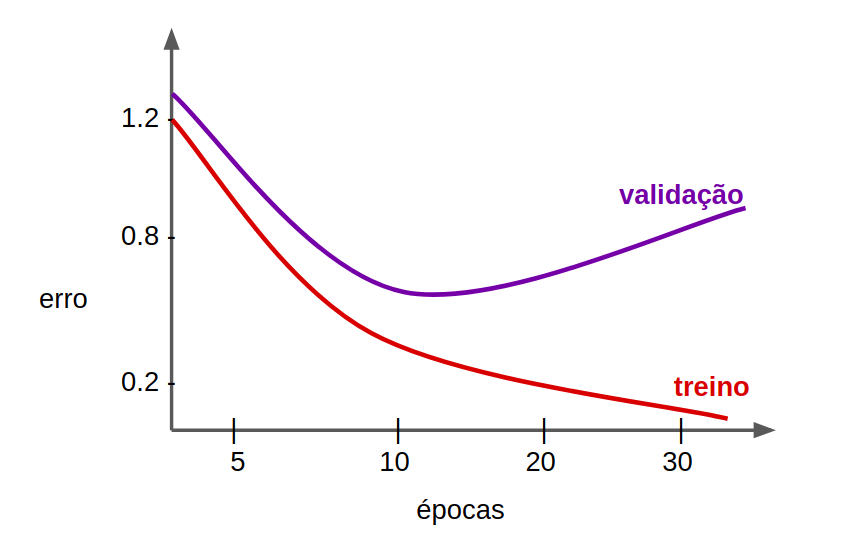

Repare na curva de validação na qual o erro aumenta cada vez mais e na curva de treino que ele apenas reduz. Isso indica que nosso modelo está perdendo pouquíssima informação no treino e muita na validação. O que mostra que ele está servindo bem demais o modelo, overfitting.

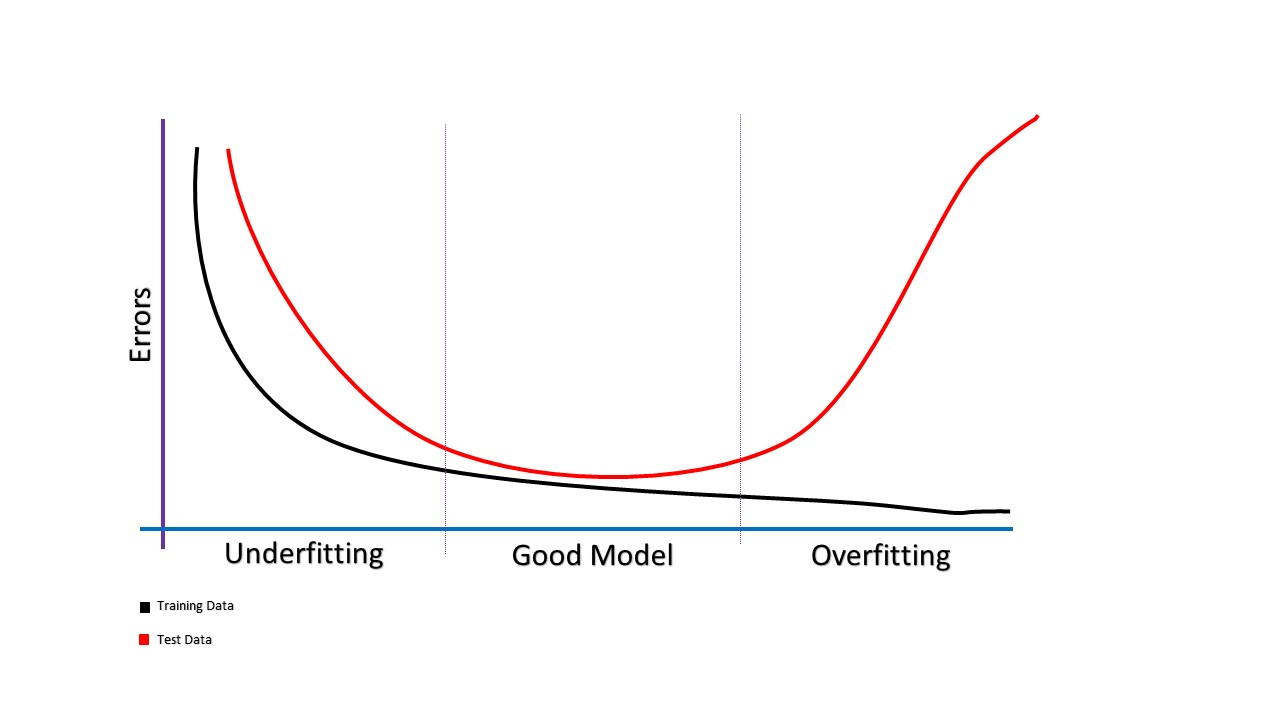

# Salvando o nosso modelo

In [15]:
model.save('model_fashion_mnist.h5')

## Carregando o modelo salvo

In [16]:
from tensorflow.keras.models import load_model

modelo_saved = load_model('model_fashion_mnist.h5')

Nesse caso, estamos nos introduzindo e também lidando com um só modelo. Mas, no dia a dia, pode ser que tenhamos 3, 4, 5 modelos diferentes e também variações do números de épocas de treinamento.

Então, podemos usar um outro tipo de nomenclatura, ao invés de salvarmos como modelo.h5, podemos dar mais detalhes como o número de épocas e o número de nós (ou camadas), salvando como modelo_epochs5_nos3.h5, por exemplo, para não misturarmos os modelos.

## Testando o modelo salvo

Previsto: Pullover
Categoria prevista: 2
Categoria real: 2


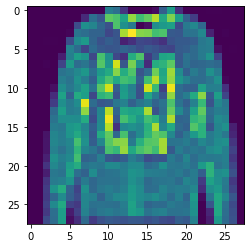

In [17]:
i = 500

saved_model_preds = modelo_saved.predict(X_test)
name = nomes_clf[np.argmax(saved_model_preds[i])]
plt.imshow(X_test[i])
print('Previsto:',name)
print('Categoria prevista:',np.argmax(saved_model_preds[i]))
print('Categoria real:',y_test[i])